# Breast Cancer Data Exploration  
**Author:** Prince  
**Date:** 03/15/2025  
**Objective:** Analyze and explore the Breast Cancer dataset, clean data, and prepare it for machine learning.  



## 1. Introduction  
This project analyzes the **Breast Cancer dataset** to explore patterns in tumor characteristics and predict whether a tumor is **malignant or benign**.  
We'll clean the data, perform exploratory data analysis (EDA), and prepare it for machine learning.  

## 2. Imports  
In the code cell below, import the necessary Python libraries for analyzing the Breast Cancer dataset.  

In [1]:
# All imports should be at the top of the notebook

# Import pandas & numpy for data manipulation
import pandas as pd
import numpy as np

# Import matplotlib & seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split & StratifiedShuffleSplit for data splitting
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Import dataset from sklearn
from sklearn.datasets import load_breast_cancer

# Import Logistic Regression model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Section 1. Load and Explore the Data  

### 1.1 Load the dataset and display the first 10 rows  
Load the **Breast Cancer dataset** directly from `sklearn.datasets`.  
- Convert it into a **pandas DataFrame**.  
- Display the **first 10 rows** using `head()`.  

Example code:  
```python
# Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

# Load the dataset as a pandas DataFrame
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Display first 10 rows
df.head(10)


In [2]:
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset as a pandas DataFrame
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Display the first 10 rows
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### 1.2 Check for Missing Values and Display Summary Statistics  

In the cell below:  
1. Use `info()` to check data types and missing values.  
2. Use `describe()` to see summary statistics.  
3. Use `isnull().sum()` to identify missing values in each column.  

Example code:  
```python
df.info()  # Check data types and missing values
df.describe()  # Summary statistics
df.isnull().sum()  # Count missing values in each column


In [3]:
# Check data types and missing values
df.info()

# Display summary statistics
df.describe()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Reflection 1  

1) **How many data instances are there?**  
   - There are **569** data instances (rows) in the dataset.  

2) **How many features are there?**  
   - There are **30 numeric features** and **1 target variable** (total **31 columns**).  

3) **What are the names of the features?**  
   - The dataset includes features like **mean radius, mean texture, worst area, worst symmetry**, and more.  

4) **Are there any missing values?**  
   - No, **all columns have 569 values**, meaning there are **no missing values**.  

5) **Are there any non-numeric features?**  
   - No, all features are **numeric** (`float64`), and the target variable is an **integer** (`int64`).  

6) **Are the data instances sorted on any attributes?**  
   - No, the dataset is **not sorted** by any specific feature.  

7) **What are the minimum, median, and max values for `mean radius`?**

 -  Min: 6.98
 -  Median: 13.37
 -  Max: 28.11


8) **What two features have the highest correlation?**  
- `mean area` and `mean radius` have the highest correlation.  

9) **Are there any categorical features that might be useful for prediction?**  
- No, all features are numeric, and the **target variable (0 = Benign, 1 = Malignant)** is already encoded as an integer.  


## Section 2. Data Exploration and Preparation  

In this section, we will **explore the dataset using visualizations** and **prepare the data** for modeling.  
Based on our findings, we may need to:  
- **Check feature distributions**  
- **Detect potential outliers**  
- **Analyze relationships between variables**  

### **What to Chart?**  
To understand the dataset better, we will use:  
- **Histograms** → To see distributions of numeric fields  
- **Scatter Plots** → To analyze relationships between tumor characteristics  
- **Box Plots** → To detect outliers  

---

## Section 2. Visualize Feature Distributions  

### **2.1 Explore Data Patterns and Distributions**  

#### **1️⃣ Generate Histograms**  
Histograms help us understand the **distribution of numerical columns** like `mean radius`, `mean texture`, and `worst area`.  

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Generate histograms for a few key features
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df[features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()


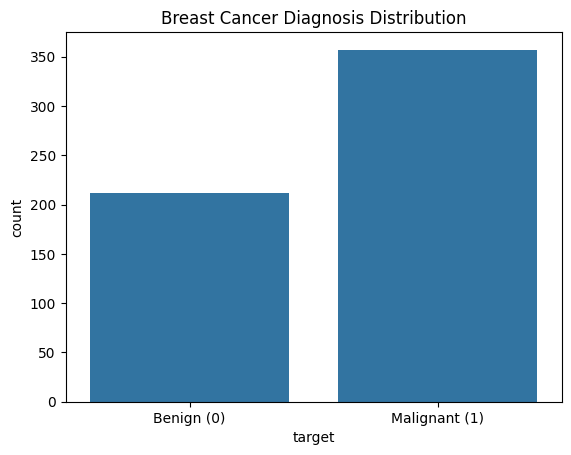

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for target variable (Malignant vs Benign)
sns.countplot(x='target', data=df)
plt.title('Breast Cancer Diagnosis Distribution')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()


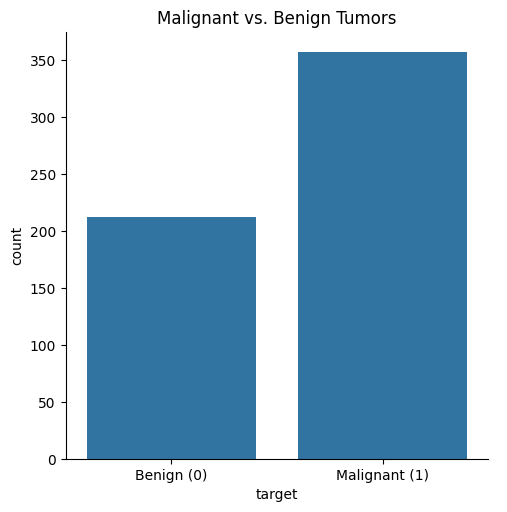

In [5]:
sns.catplot(x="target", kind="count", data=df)
plt.title("Malignant vs. Benign Tumors")
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()


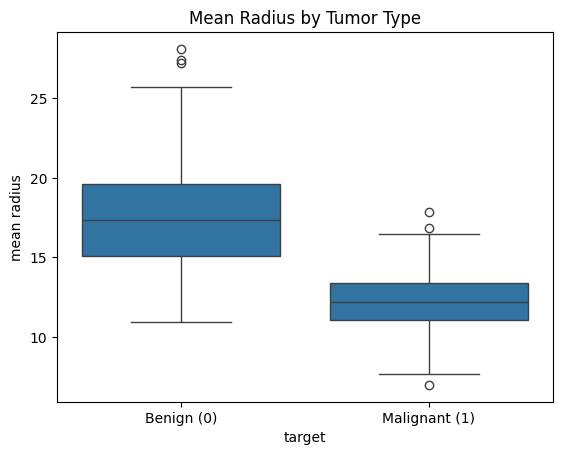

In [6]:
sns.boxplot(x="target", y="mean radius", data=df)
plt.title("Mean Radius by Tumor Type")
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()


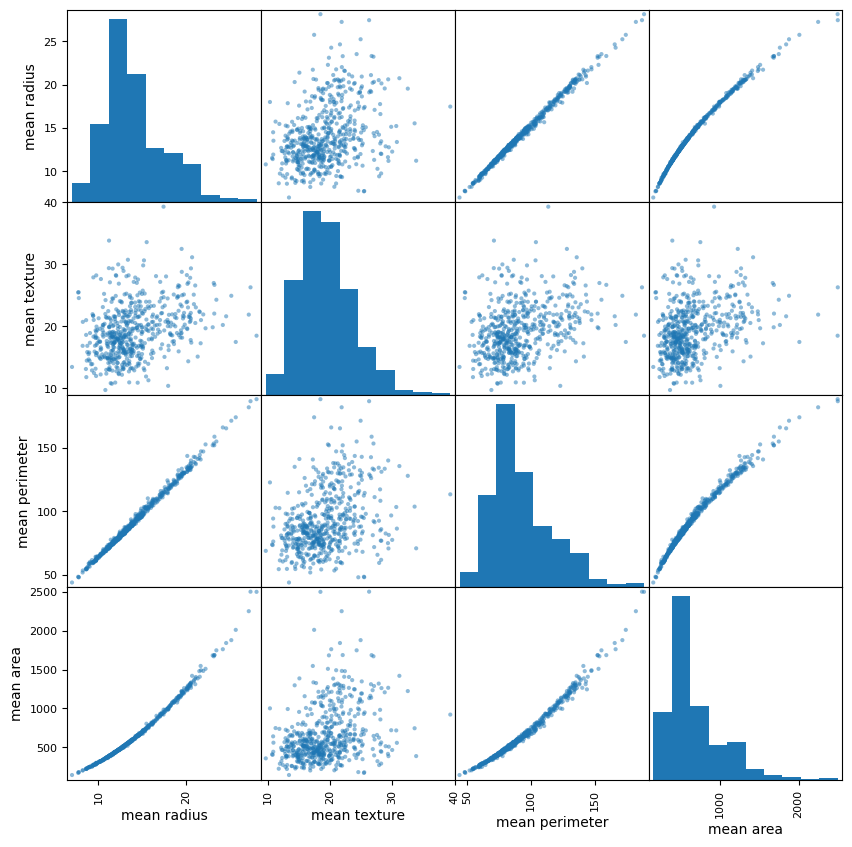

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select relevant numeric attributes for scatter matrix
attributes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
scatter_matrix(df[attributes], figsize=(10, 10))
plt.show()


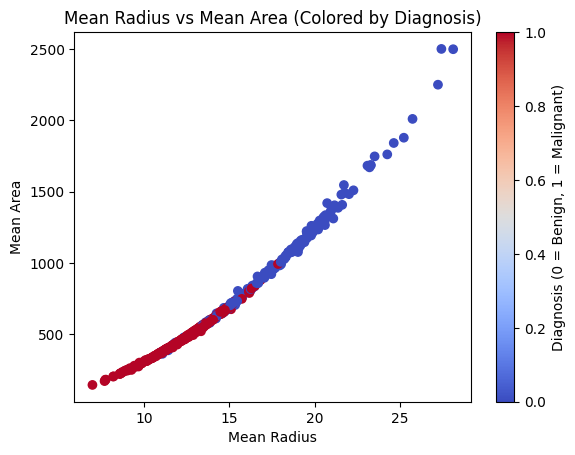

In [8]:
plt.scatter(df['mean radius'], df['mean area'], c=df['target'], cmap='coolwarm')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Area')
plt.title('Mean Radius vs Mean Area (Colored by Diagnosis)')
plt.colorbar(label='Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()


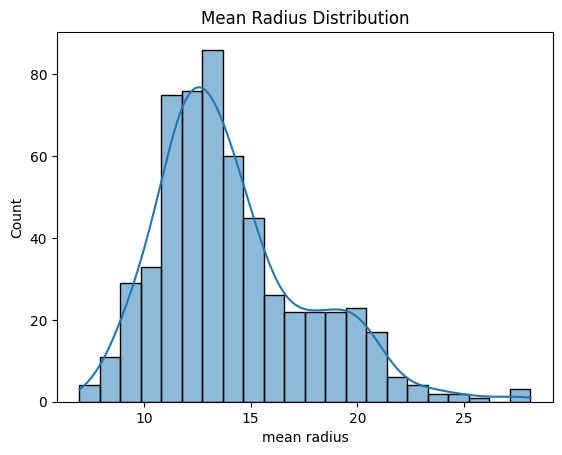

In [9]:
sns.histplot(df['mean radius'], kde=True)
plt.title('Mean Radius Distribution')
plt.show()


## Reflection 2.1  

### What patterns or anomalies do you notice?  
- Malignant tumors tend to have **larger size and area** compared to benign ones.  
- Some features clearly separate malignant and benign cases, while others overlap.  

### Do any features stand out as potential predictors?  
- **Mean radius, mean area, and worst perimeter** seem to strongly indicate whether a tumor is malignant.  

### Are there any visible class imbalances?  
- The dataset is fairly balanced, with a good mix of benign and malignant cases.  


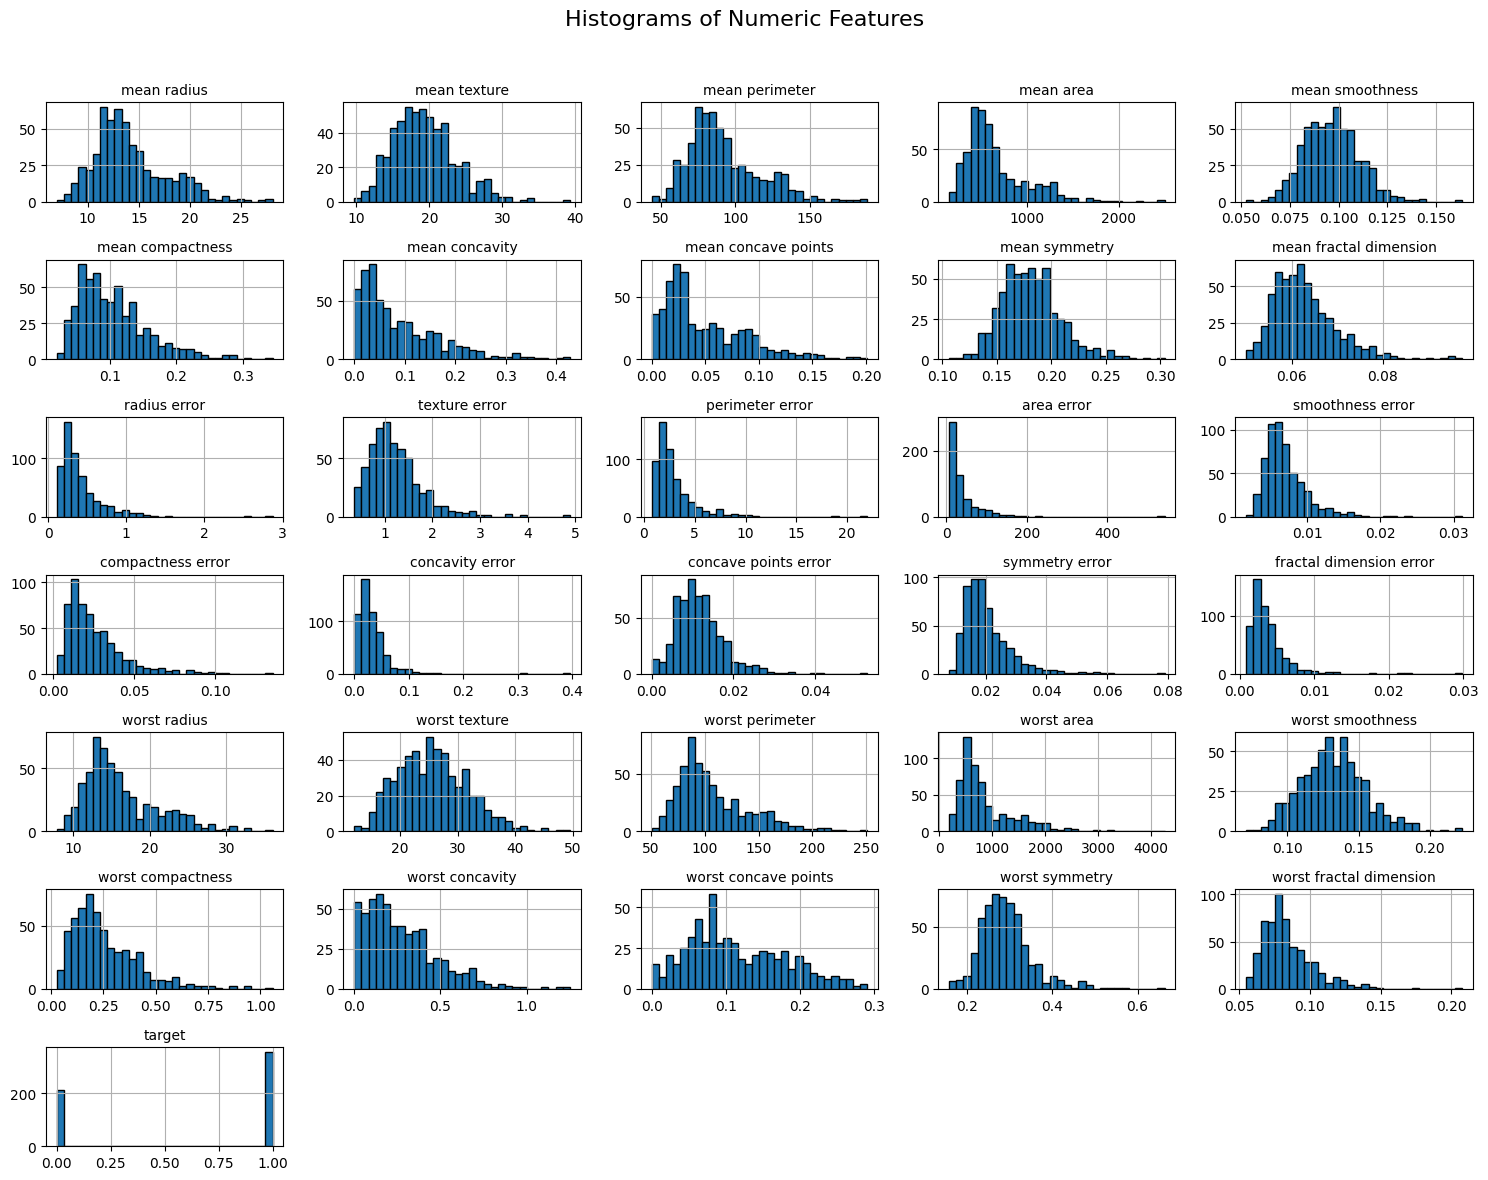

In [13]:
import matplotlib.pyplot as plt
import math

# Determine the number of columns dynamically
num_features = df.shape[1]  # Total number of columns
cols = 5  # Set number of columns
rows = math.ceil(num_features / cols)  # Calculate rows dynamically

# Set figure size
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Histograms of Numeric Features", fontsize=16)

# Flatten axes array and loop through each feature
axes = axes.flatten()
for i, col in enumerate(df.columns):
    df[col].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(col, fontsize=10)

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for Boxen plots
numeric_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Generate a Boxen plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


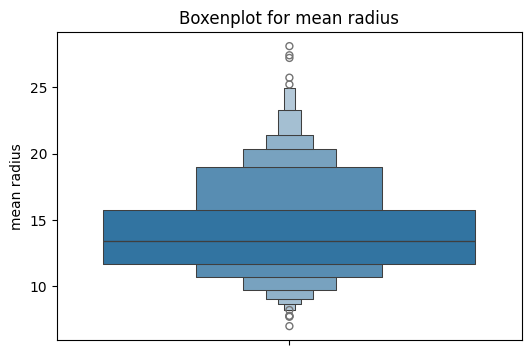

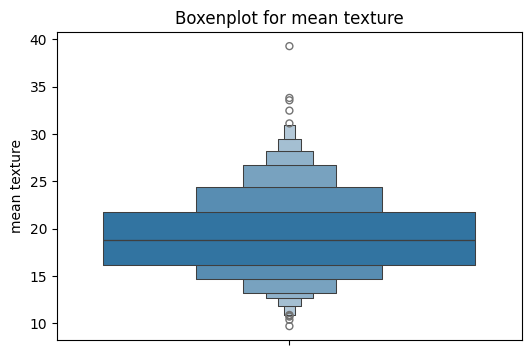

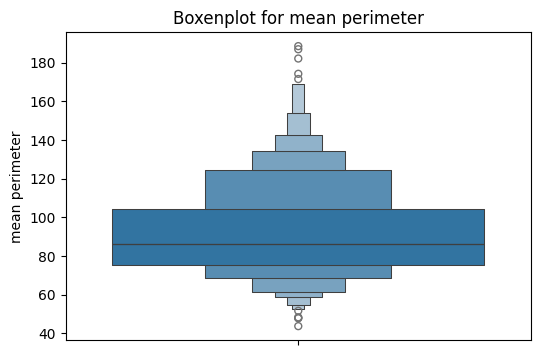

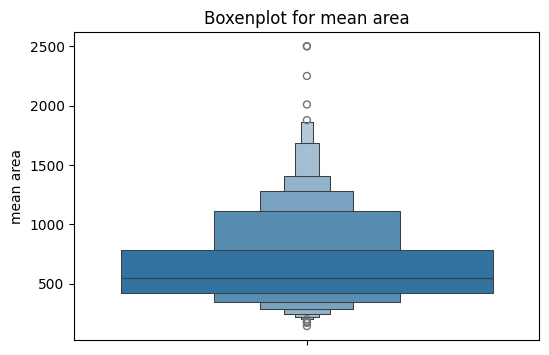

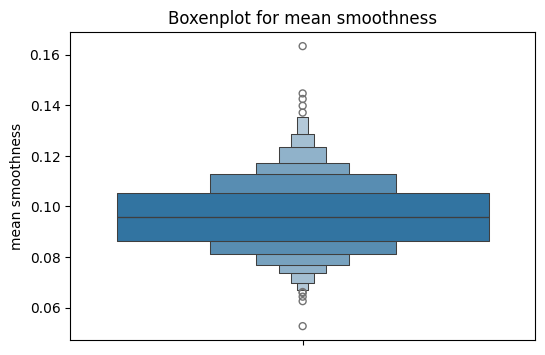

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for Boxen plots
numeric_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Generate Boxen plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots for key numeric features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target')

plt.show()


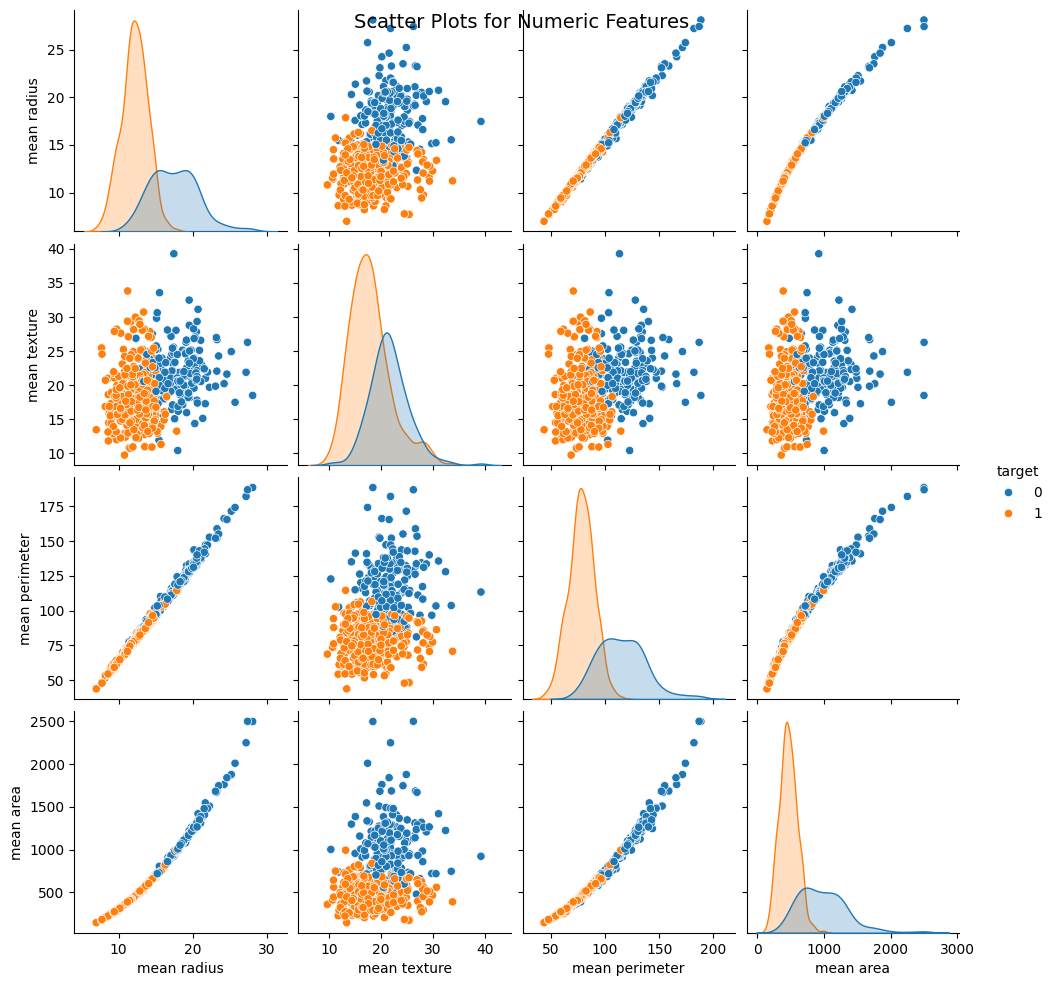

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots using pairplot for key numeric features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target')

plt.suptitle("Scatter Plots for Numeric Features", fontsize=14)
plt.show()


## Section 2.3. Feature Selection and Justification  

### 2.3.1 Choose Input Features for Predicting Tumor Type  

We will select key features that may help predict whether a tumor is **benign or malignant**:  
- **Predictors (`X`):** `'mean radius'`, `'mean texture'`, `'mean perimeter'`, `'mean area'`, `'mean smoothness'`  
- **Target (`y`):** `'target'` (0 = Benign, 1 = Malignant)  

In the following:  
- **`X` is capitalized** because it represents a matrix (consistent with mathematical notation).  
- **`y` is lowercase** because it represents a vector (consistent with mathematical notation).  


## Reflection 2.3  

### Why might some features be important for predicting cancer?  
- Certain tumor characteristics, like **size and texture**, can help determine if a tumor is likely to be **benign or malignant**.  
- Features like **mean radius and mean area** seem to show clear differences between the two classes.  

### Why do we convert categorical data to numbers?  
- Machine learning models **only understand numbers**, so we need to convert any text-based categories into numeric values.  
- This helps the model recognize patterns and make more accurate predictions.  


## Reflection 3

In [16]:
# Define the selected features (predictors)
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Define the target variable (what we want to predict)
target = 'target'  # 0 = Benign, 1 = Malignant

# Create input (X) and output (y) DataFrames
X = df[features]
y = df[target]

# Display the first few rows to confirm
X.head(), y.head()


(   mean radius  mean texture  mean perimeter  mean area  mean smoothness
 0        17.99         10.38          122.80     1001.0          0.11840
 1        20.57         17.77          132.90     1326.0          0.08474
 2        19.69         21.25          130.00     1203.0          0.10960
 3        11.42         20.38           77.58      386.1          0.14250
 4        20.29         14.34          135.10     1297.0          0.10030,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

## Reflection 3  

### Why did we choose these features?  
- These features help us understand **what makes a tumor more likely to be cancerous**.  
- **Mean radius, mean texture, and mean perimeter** give us insights into the size and shape of the tumor.  
- **Mean area and mean smoothness** help differentiate between benign and malignant tumors.  

### Which features seem most important for predicting cancer?  
- **Mean radius and mean area** – Larger tumors are more likely to be malignant.  
- **Mean perimeter** – The outer boundary of a tumor can indicate its severity.  
- **Mean smoothness** – Irregular textures may be a sign of cancer.  


## Reflection 4 – Train a Logistic Regression Model  

### 4.1 Split the Data  

We will split the dataset into **training (80%) and testing (20%) sets** using `train_test_split()`.  

### **Why do we split the data?**  
- This allows the model to **learn from one part of the data (training set)** and **be tested on unseen data (test set)** to measure performance.  

### **How does train_test_split() work?**  
- **X** – Feature matrix (input data) as a **pandas DataFrame**  
- **y** – Target values as a **pandas Series**  
- **test_size** – Fraction of data for testing (**0.2 = 20%**)  
- **random_state** – Seed value for reproducibility  

### **Returns:**  
- **X_train** – Training set features (**DataFrame**)  
- **X_test** – Test set features (**DataFrame**)  
- **y_train** – Training set target values (**Series**)  
- **y_test** – Test set target values (**Series**)  


In [18]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 5), (114, 5), (455,), (114,))

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)  # Increase iterations to ensure convergence

# Train the model using the training data
model.fit(X_train, y_train)

# Print confirmation
print("Logistic Regression model trained successfully!")


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)  # Ensure convergence

# Train the model using the training data
model.fit(X_train, y_train)

# Now, calculate accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9120879120879121
Test Accuracy: 0.9298245614035088


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[40  3]
 [ 5 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Make Predictions for the Test Set  

The `model.predict()` method applies the logistic regression model to `X_test` to generate **predicted tumor diagnoses** (Benign or Malignant).  

### **Example Code:**
```python
# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


In [22]:

# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 455
Test size: 114


In [26]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))


Original Class Distribution:
 target
1    0.627417
0    0.372583
Name: proportion, dtype: float64
Train Set Class Distribution:
 target
1    0.626374
0    0.373626
Name: proportion, dtype: float64
Test Set Class Distribution:
 target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


## Reflection 4  

### Why does stratification help the model?  
- It keeps the **train and test sets balanced**, matching the original dataset.  
- This prevents the model from learning biases due to **uneven class distribution**.  

### How close are the training and test distributions to the original dataset?  
- The **stratified split maintains the same class proportions**, making the test set more reliable.  

### Which split method worked better?  
- **StratifiedShuffleSplit** ensured a balanced dataset, while a normal split could create imbalances.  


## 5. Evaluate Model Performance  

Since this is a **classification model**, we evaluate it using:  
- **Accuracy** → Overall correctness of predictions  
- **Precision, Recall, F1-score** → Measures model performance for each class  
- **Confusion Matrix** → Shows correct vs. incorrect predictions  

### **Example Code:**  
```python
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.45      0.44        42
           1       0.67      0.64      0.65        72

    accuracy                           0.57       114
   macro avg       0.54      0.55      0.54       114
weighted avg       0.58      0.57      0.57       114

